In [2]:
import numpy as np 
import pandas as pd
import os
from sklearn.utils import shuffle
path='D:/1. 7th sem/Project/Recommendation and Classification System/archive/Data'
data = pd.read_csv(f'{path}/features_3_sec.csv')
data = shuffle(data)
data = shuffle(data)
individual_data=data
data.reset_index(drop=True, inplace=True)
data = data.iloc[0:, 1:] 
print(data.shape)
data.head()

(9990, 59)


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.405787,0.082133,0.138221,0.001277,2230.722642,1.921654e+05,2038.281631,56932.695538,4218.685772,...,27.185362,-10.830551,43.171944,-0.281758,24.902754,-4.999583,26.031410,-4.887905,39.240589,rock
1,66149,0.205412,0.081193,0.098849,0.000238,1928.115766,9.132848e+04,2272.407417,101514.610622,3982.980018,...,29.312222,-7.789501,18.747837,-11.615203,29.020212,-14.925071,21.303030,-7.999190,36.818485,country
2,66149,0.293029,0.086424,0.175412,0.001872,1775.728875,1.343576e+05,1921.424755,69514.878560,3646.233849,...,50.299793,-12.192084,48.552959,2.421471,59.898277,-6.586587,30.366610,-4.493878,24.663740,country
3,66149,0.316217,0.080690,0.119825,0.001141,1551.235360,9.060583e+04,1645.740903,74766.679591,3111.713492,...,24.863947,-13.581235,56.023800,2.175846,60.637058,-2.861668,34.270058,-4.363754,50.375687,country
4,66149,0.426340,0.084950,0.222834,0.006659,3634.764588,1.154008e+06,3150.671548,94277.461877,7482.788086,...,39.668736,-0.770678,42.563206,0.404900,42.437664,-0.206093,64.655235,-3.245765,81.790466,pop


In [3]:
print(list(os.listdir(f'{path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [4]:
## Processing and Normalization
from sklearn import preprocessing
y = data['label'] 
X = data.loc[:, data.columns != 'label'] 
X = X.loc[:, X.columns != 'length'] 

individual_data = individual_data.loc[:, individual_data.columns != 'label'] 
# Normalize
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

In [5]:
# Splitting the data into Test(20%) and Train(80%) dataframes.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
## Classification using XGBoost model
from sklearn.metrics import roc_auc_score, accuracy_score,roc_curve, precision_recall_curve, auc, confusion_matrix
from xgboost import XGBClassifier, XGBRFClassifier
estimators=[300, 500, 1000]
for x in estimators:    
    for i in range (3,7):
        xgb = XGBClassifier(n_estimators=x, max_depth=i, n_jobs=-1)
        xgb.fit(X_train, y_train)
        preds = xgb.predict(X_test)
        print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n','estimators: ',x,'\n','maxdepth: ', i) 

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.9014 
 estimators:  300 
 maxdepth:  3
[13:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy : 0.9049 
 estimators:  300 
 maxdepth:  4


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:58:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.91041 
 estimators:  300 
 maxdepth:  5


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.90641 
 estimators:  300 
 maxdepth:  6
[13:59:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy : 0.90691 
 estimators:  500 
 maxdepth:  3
[14:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Accuracy : 0.91041 
 estimators:  500 
 maxdepth:  4


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.91141 
 estimators:  500 
 maxdepth:  5


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.90741 
 estimators:  500 
 maxdepth:  6
[14:03:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy : 0.90991 
 estimators:  1000 
 maxdepth:  3
[14:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy : 0.91091 
 estimators:  1000 
 maxdepth:  4


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.91141 
 estimators:  1000 
 maxdepth:  5


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.90741 
 estimators:  1000 
 maxdepth:  6


In [8]:
## as we can see maximum accuracy is found when Maxdepth is 6 and NumberOfEstimators is 1000.
xgb = XGBClassifier(n_estimators=1000, max_depth=6, n_jobs=-1)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
print('Accuracy', ':', round(accuracy_score(y_test, preds), 5))

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:16:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.90741


In [9]:
X_test.tail()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
7292,0.144167,0.700944,0.156238,0.020291,0.226570,0.022977,0.641447,0.082193,0.346059,0.134201,...,0.265953,0.037966,0.253393,0.115151,0.220791,0.087464,0.527003,0.050099,0.524321,0.088255
7710,0.438740,0.654054,0.463773,0.103972,0.534284,0.074001,0.791703,0.065959,0.716442,0.062480,...,0.268817,0.038865,0.295296,0.124486,0.193430,0.045835,0.301759,0.026107,0.433630,0.075205
4094,0.624955,0.616458,0.464591,0.120432,0.569794,0.047116,0.663952,0.035228,0.643669,0.040609,...,0.436217,0.043254,0.431312,0.064913,0.423248,0.052670,0.447444,0.028309,0.515260,0.064749
3944,0.330692,0.721965,0.259624,0.061119,0.144328,0.015686,0.310676,0.069449,0.168105,0.025866,...,0.303506,0.029190,0.310805,0.135405,0.288938,0.024805,0.422385,0.021687,0.469580,0.053926
8256,0.417087,0.670697,0.219586,0.039150,0.370266,0.135439,0.575191,0.172036,0.454534,0.243923,...,0.317408,0.039976,0.473906,0.066060,0.450052,0.083287,0.450569,0.048931,0.480029,0.033774


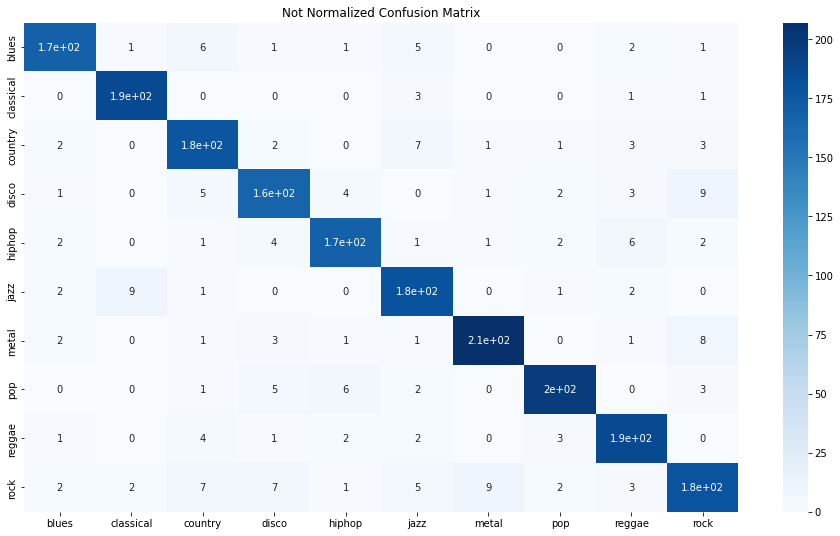

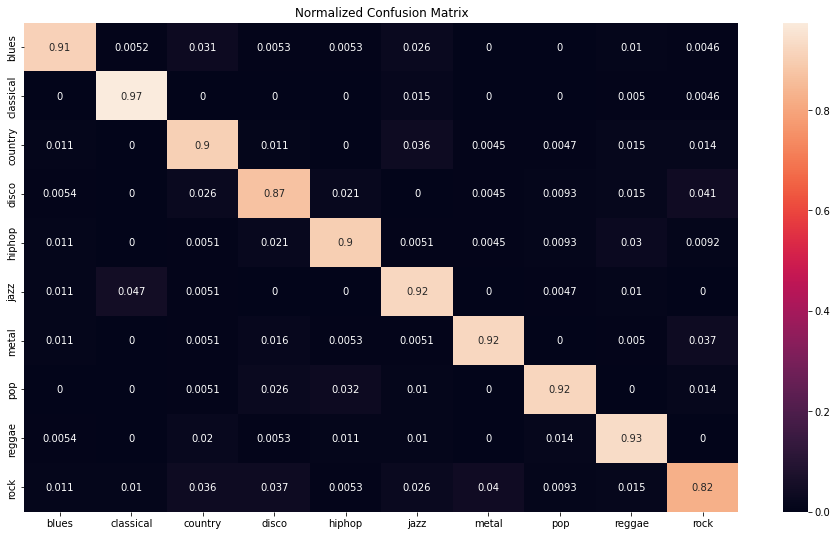

In [11]:
## plotting confusion matrices
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matr = confusion_matrix(y_test, preds) 
fig1=plt.figure(figsize = (16, 9))
plt.title("Not Normalized Confusion Matrix")
xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
sns.heatmap(confusion_matr, cmap="Blues", annot=True, xticklabels=xticklabels,yticklabels=yticklabels);
p1=plt.savefig("confusion matrix")
fig2=plt.figure(figsize=(16,9))
plt.title("Normalized Confusion Matrix")
sns.heatmap(confusion_matr/confusion_matr.sum(axis=1), annot=True,xticklabels=xticklabels,yticklabels=yticklabels)
p2=plt.savefig("normalized confusion matrix")